In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage
from bioinfokit.visuz import cluster
from collections import Counter
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
from warnings import filterwarnings
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

In [52]:
data = pd.read_csv('mcdonalds.csv')

In [53]:
print(data.head(20))
print(data.info())
print(data.describe())
print(data.isnull().sum())
print(data.dtypes)

   yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0     No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1    Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2     No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3    Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4     No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   
5    Yes        Yes    No       Yes     No  Yes   Yes   Yes        No      No   
6    Yes        Yes   Yes       Yes     No  Yes    No   Yes       Yes     Yes   
7    Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
8     No         No    No       Yes    Yes   No    No    No       Yes      No   
9    Yes        Yes    No       Yes    Yes  Yes    No   Yes       Yes      No   
10    No        Yes    No       Yes     No  Yes   Yes    No        No      No   
11   Yes        Yes    No   

In [54]:
print(data['Gender'].value_counts())
print(data['VisitFrequency'].value_counts())
print(data['Like'].value_counts())
print(data['Age'].value_counts())

Gender
Female    788
Male      665
Name: count, dtype: int64
VisitFrequency
Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: count, dtype: int64
Like
+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: count, dtype: int64
Age
55    53
60    38
37    37
59    36
57    36
52    36
58    35
36    35
49    34
62    34
50    34
32    33
44    32
56    32
64    32
53    31
26    31
24    30
35    30
51    30
47    30
42    30
23    30
39    29
29    28
34    28
30    28
38    27
40    27
31    27
25    26
33    26
61    26
67    26
48    26
43    25
27    25
63    25
54    24
41    23
22    23
65    23
45    22
20    21
46    19
28    18
66    17
21    16
18    16
70    15
69    14
68    13
1

In [55]:
binary_data = (data.iloc[:, :11] == "Yes").astype(int)
column_means = np.round(binary_data.mean(), 2)
print(column_means)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


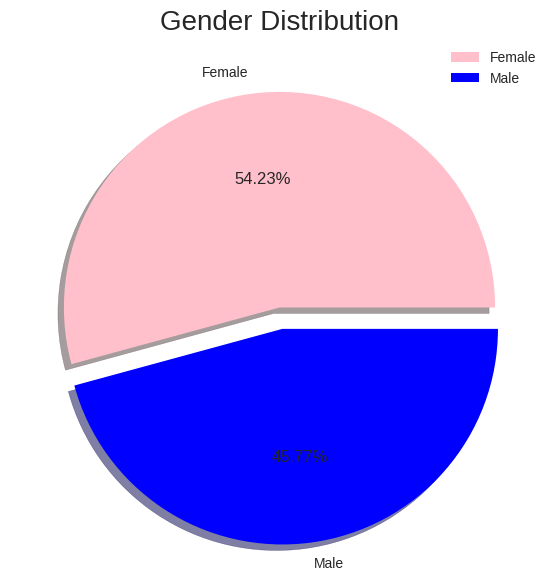

In [56]:
gender_labels = ['Female', 'Male']
gender_sizes = data['Gender'].value_counts()
colors = ['pink', 'blue']
explode = [0, 0.1]
plt.figure(figsize=(7, 7))
plt.pie(gender_sizes, colors=colors, explode=explode, labels=gender_labels, shadow=True, autopct='%.2f%%')
plt.title('Gender Distribution', fontsize=20)
plt.axis('off')
plt.legend()
plt.show()

/tmp/ipykernel_3806/2692003218.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  age_plot = sns.countplot(x=data['Age'], palette='viridis')


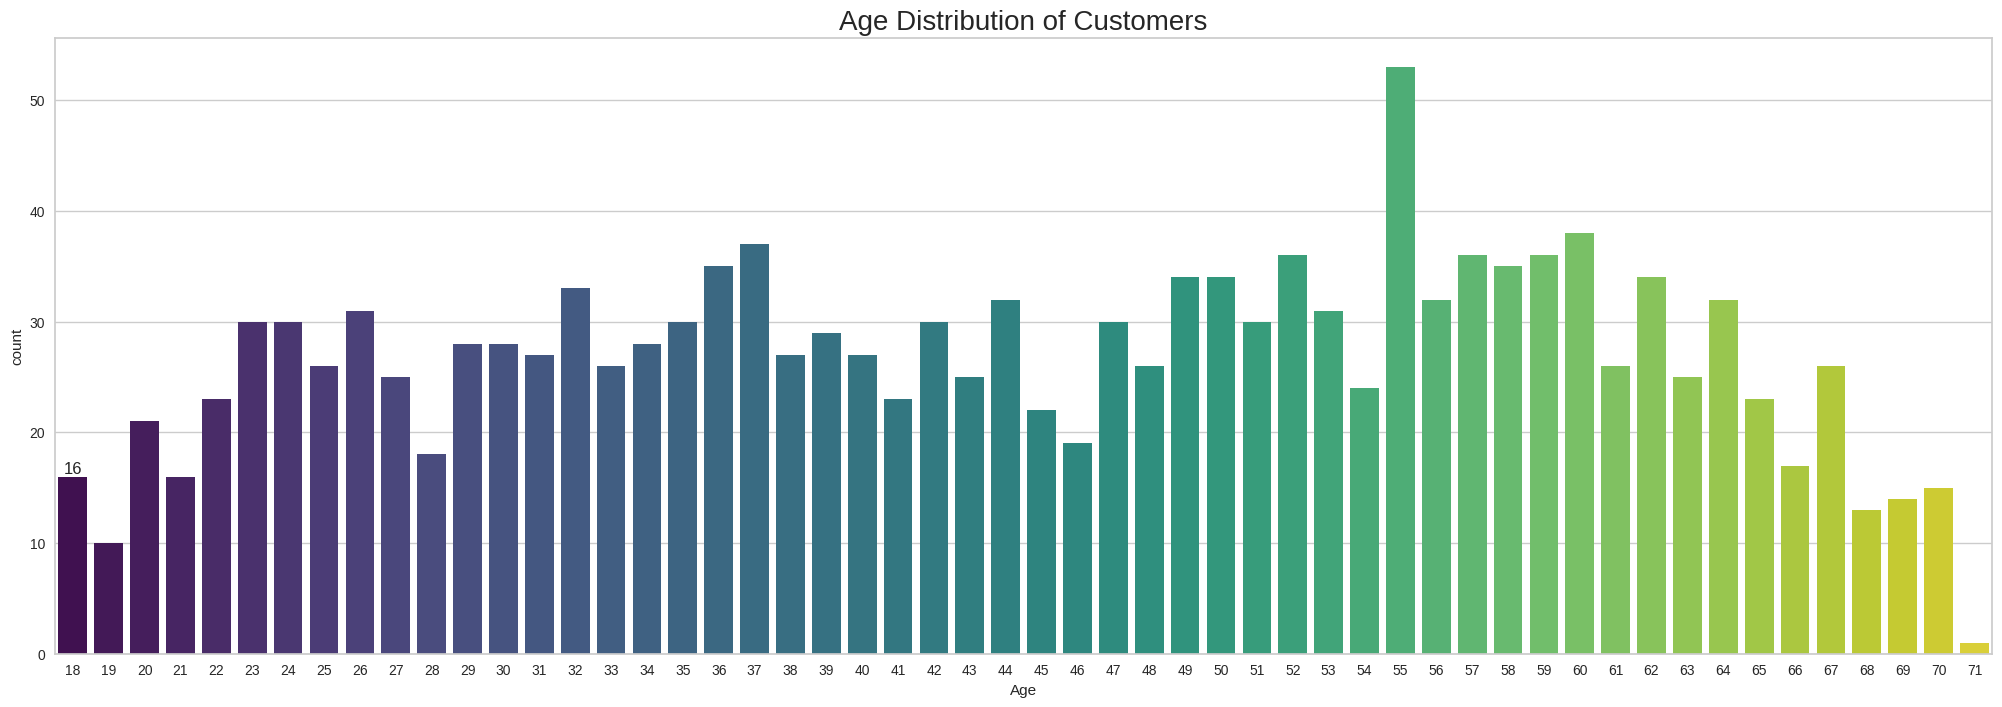

In [57]:
plt.figure(figsize=(25, 8))
age_plot = sns.countplot(x=data['Age'], palette='viridis')
age_plot.bar_label(age_plot.containers[0])
plt.title('Age Distribution of Customers', fontsize=20)
plt.show()

/tmp/ipykernel_3806/3254618451.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=data, x="Like", y="Age", height=5, aspect=2, palette="Set2", kind="swarm")


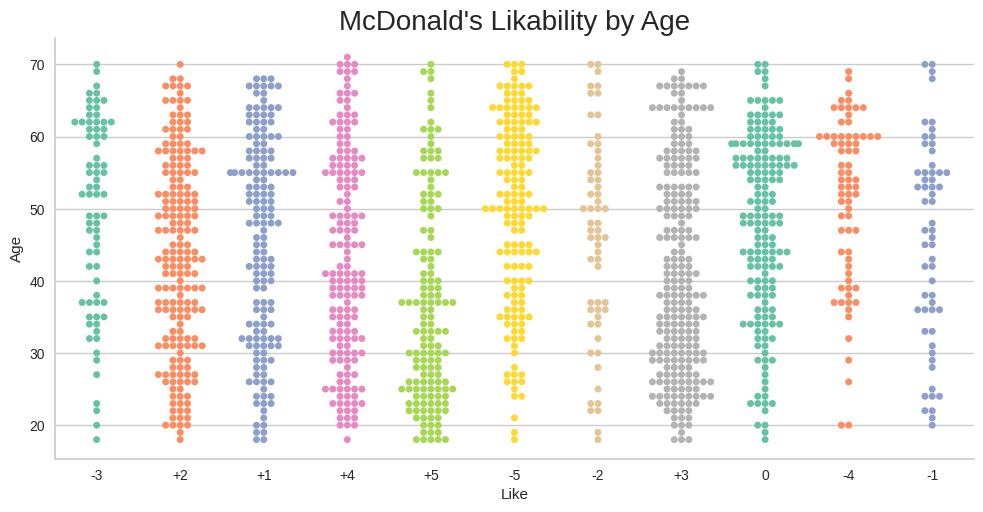

In [59]:
data['Like'] = data['Like'].replace({'I hate it!-5': '-5', 'I love it!+5': '+5'})
sns.catplot(data=data, x="Like", y="Age", height=5, aspect=2, palette="Set2", kind="swarm")
plt.title('McDonald\'s Likability by Age', fontsize=20)
plt.show();

In [60]:
columns_to_encode = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']
data_encoded = data.drop(columns=['Like', 'Age', 'VisitFrequency', 'Gender']).apply(LabelEncoder().fit_transform)

In [61]:
def perform_eda(df, fig_size):
    categorical = []
    continuous = []
    plt.figure(figsize=fig_size)
    subplot_index = 1

    for column in df.columns:
        if df[column].dtype == "object":
            categorical.append(column)
            plt.subplot((df.shape[1] + 1) // 2, 2, subplot_index)
            subplot_index += 1
            sns.countplot(data=df, x=column)
        else:
            continuous.append(column)

    for column in continuous:
        plt.subplot((df.shape[1] + 1) // 2, 2, subplot_index)
        subplot_index += 1
        sns.histplot(df[column].dropna(), kde=False)

    print(df[continuous].corr())

     Age
Age  1.0


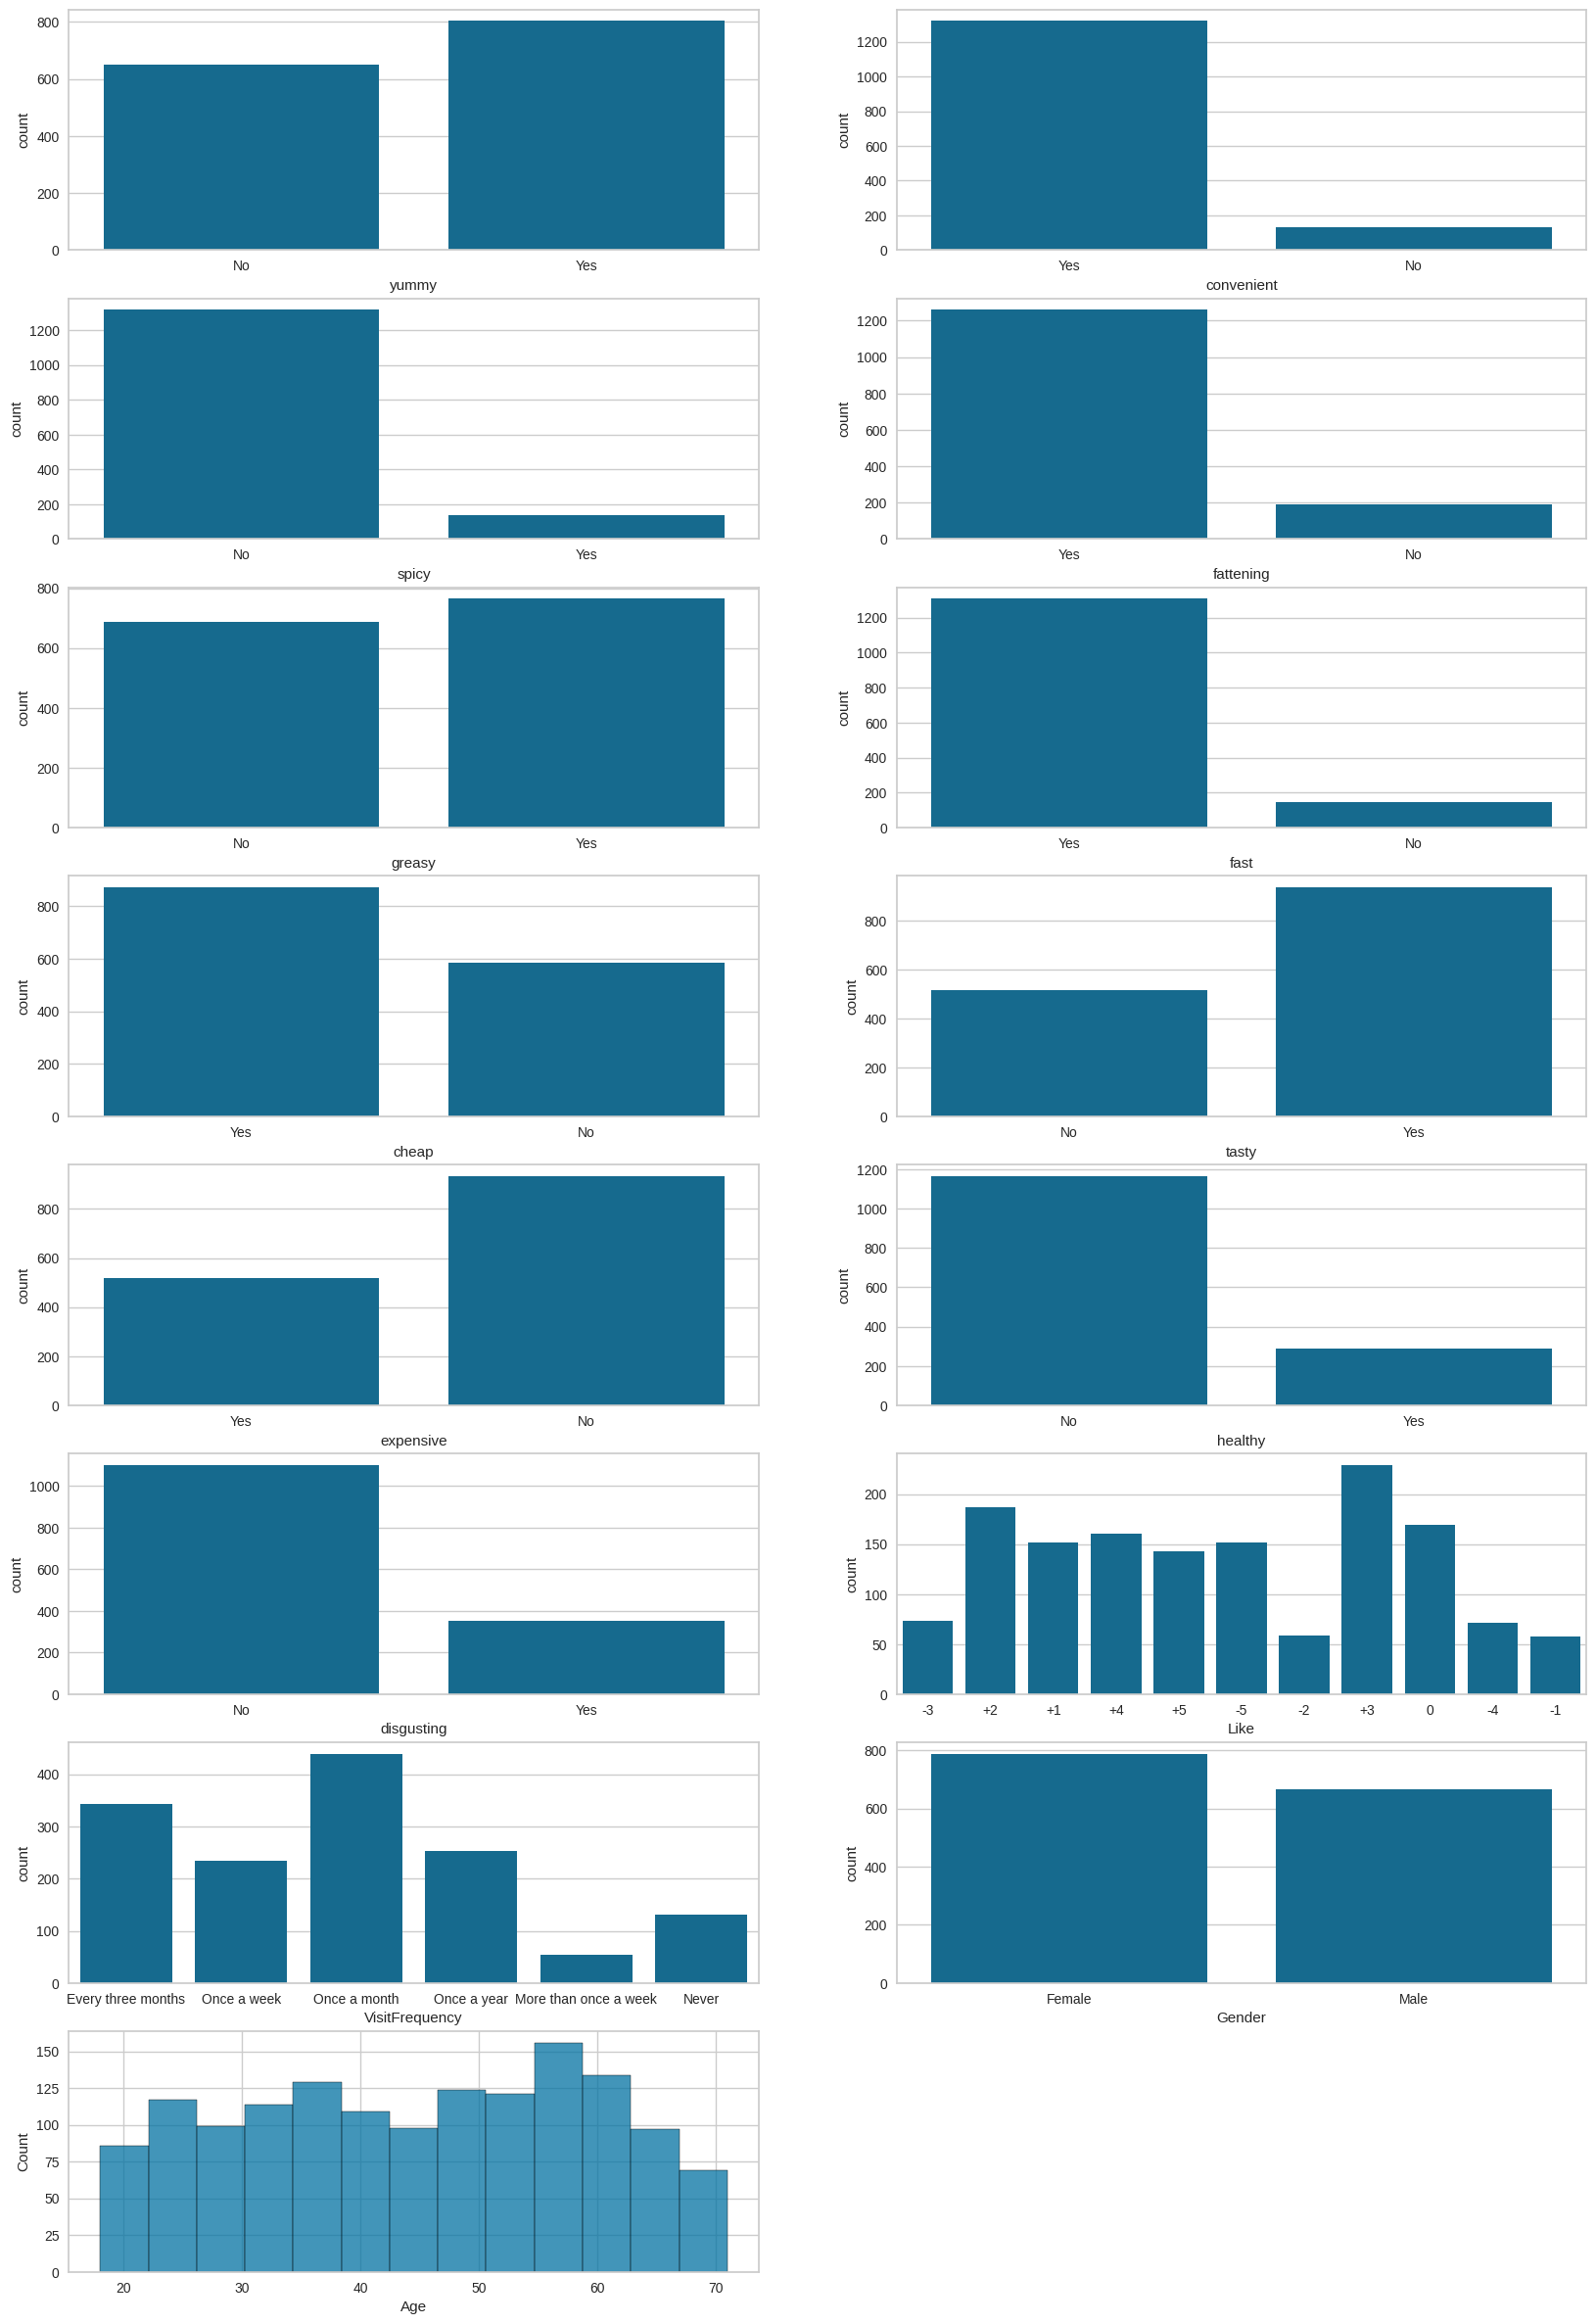

In [62]:
perform_eda(data, (20,30))

In [63]:
scaled_data = StandardScaler().fit_transform(data_encoded)
pca = PCA(n_components=11)
principal_components = pca.fit_transform(scaled_data)
principal_df = pd.DataFrame(data=principal_components, columns=['PC'+str(i) for i in range(1, 12)])
print(pca.explained_variance_ratio_)

[0.25556637 0.14834762 0.12546909 0.09826971 0.08348356 0.07109102
 0.06498559 0.05384477 0.04762809 0.02796379 0.0233504 ]


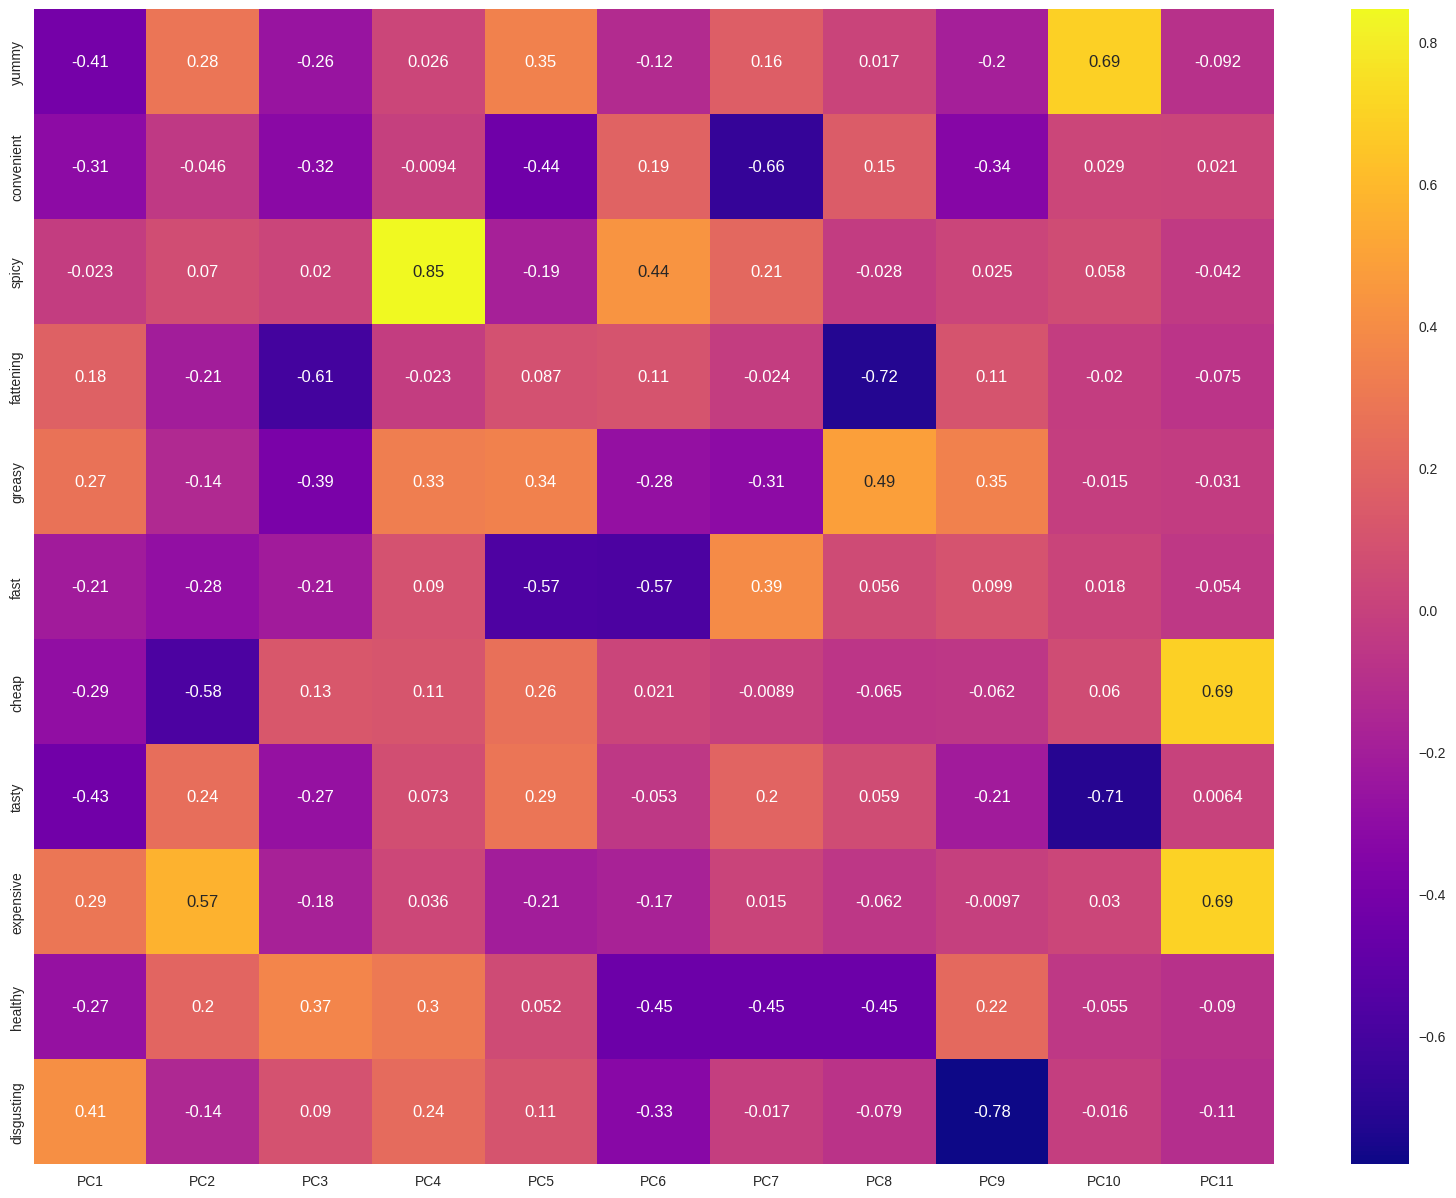

In [64]:

loadings_df = pd.DataFrame(pca.components_.T, columns=['PC'+str(i) for i in range(1, 12)], index=data_encoded.columns)
plt.figure(figsize=(20, 15))
sns.heatmap(loadings_df, annot=True, cmap='plasma')
plt.show()

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


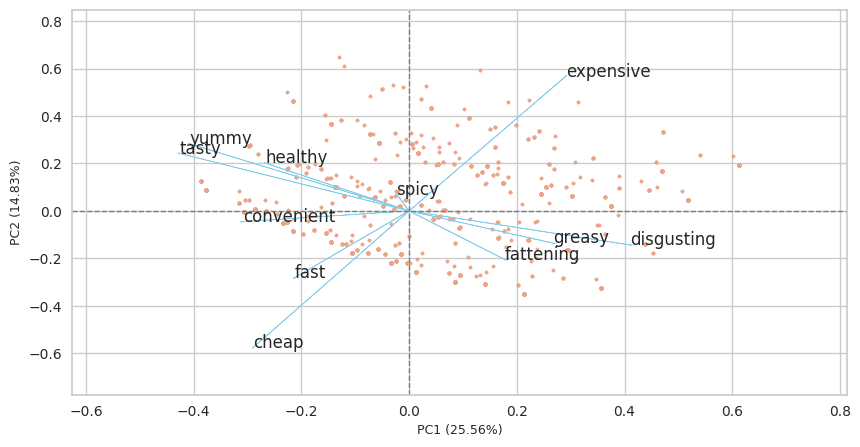

In [69]:
pca_scores = PCA().fit_transform(scaled_data)
cluster.biplot(cscore=pca_scores, loadings=pca.components_, labels=data_encoded.columns, var1=round(pca.explained_variance_ratio_[0]*100, 2), var2=round(pca.explained_variance_ratio_[1]*100, 2), show=True, dim=(10, 5))

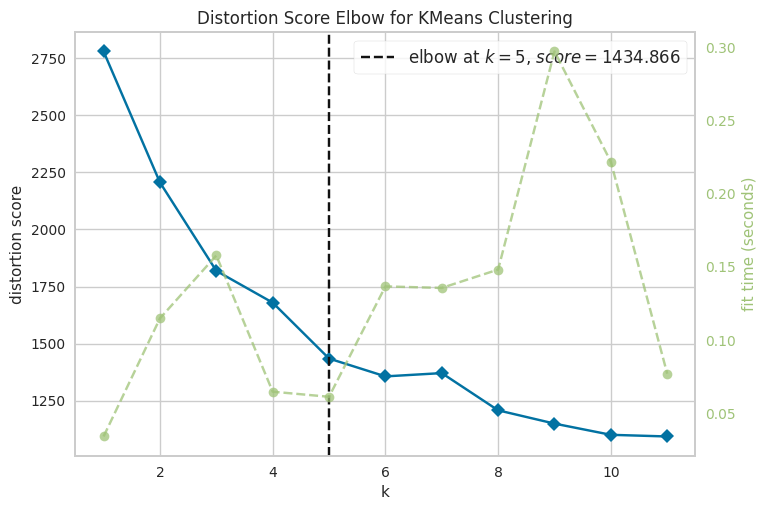

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [70]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(data_encoded)
visualizer.show()

In [71]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(data_encoded)
data['cluster_num'] = kmeans.labels_
print('Labels:', kmeans.labels_)
print('WCSS:', kmeans.inertia_)
print('No. of iterations:', kmeans.n_iter_)
print('Cluster centroids:', kmeans.cluster_centers_)
print('Cluster size:', Counter(kmeans.labels_))

Labels: [0 3 1 ... 1 3 1]
WCSS: 1748.9687521158007
No. of iterations: 9
Cluster centroids: [[ 2.70270270e-02  8.47972973e-01  6.08108108e-02  9.05405405e-01
   6.11486486e-01  9.29054054e-01  8.41216216e-01 -9.99200722e-16
   5.40540541e-02  8.10810811e-02  4.45945946e-01]
 [ 5.11627907e-01  8.43551797e-01  9.30232558e-02  9.06976744e-01
   6.19450317e-01  8.01268499e-01  2.11416490e-02  5.60253700e-01
   9.83086681e-01  1.33192389e-01  3.46723044e-01]
 [ 0.00000000e+00  9.61832061e-01  1.37404580e-01  8.70229008e-01
   5.19083969e-01  9.38931298e-01  8.39694656e-01  1.00000000e+00
   5.34351145e-02  1.45038168e-01  1.75572519e-01]
 [ 1.00000000e+00  9.81916817e-01  1.01265823e-01  8.11934901e-01
   4.03254973e-01  9.60216998e-01  9.05967450e-01  9.76491863e-01
   5.78661844e-02  3.30922242e-01  6.14828210e-02]]
Cluster size: Counter({3: 553, 1: 473, 0: 296, 2: 131})


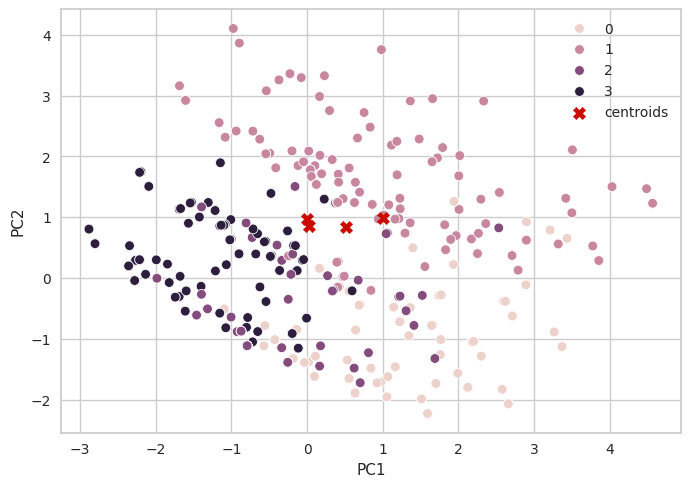

In [73]:
sns.scatterplot(data=principal_df, x="PC1", y="PC2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

<Figure size 700x500 with 0 Axes>

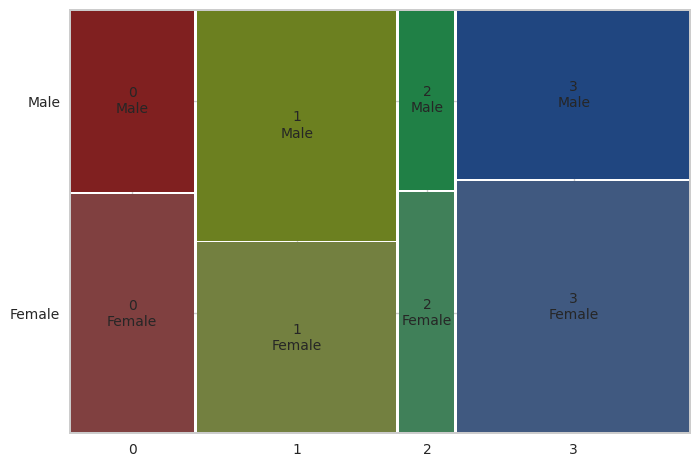

In [74]:
gender_crosstab = pd.crosstab(data['cluster_num'], data['Gender'])
plt.figure(figsize=(7, 5))
mosaic(gender_crosstab.stack())
plt.show()

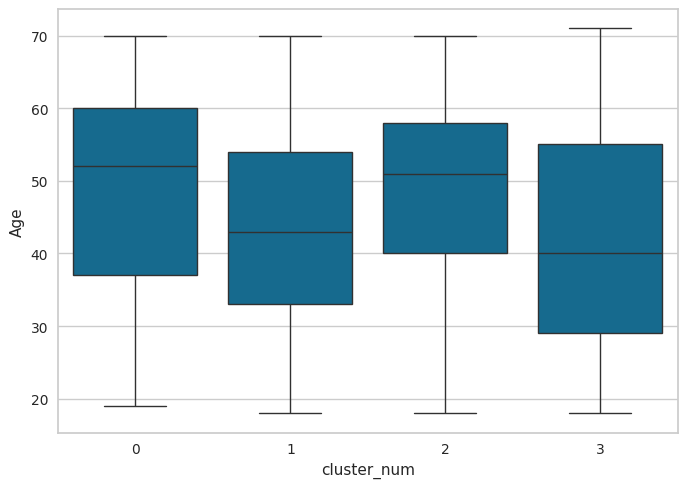

In [75]:
sns.boxplot(x="cluster_num", y="Age", data=data)
plt.show()

In [76]:
data['VisitFrequency'] = LabelEncoder().fit_transform(data['VisitFrequency'])
data['Like'] = LabelEncoder().fit_transform(data['Like'])
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])

In [77]:
visit_mean = data.groupby('cluster_num')['VisitFrequency'].mean().reset_index()
like_mean = data.groupby('cluster_num')['Like'].mean().reset_index()
gender_mean = data.groupby('cluster_num')['Gender'].mean().reset_index()

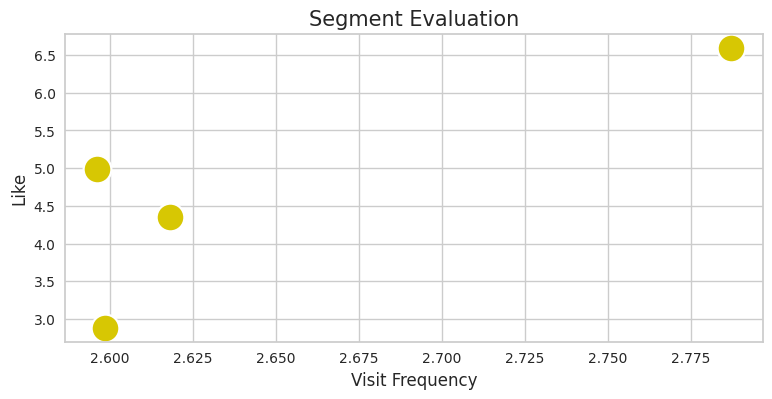

In [78]:
segment_evaluation = gender_mean.merge(like_mean, on='cluster_num').merge(visit_mean, on='cluster_num')
plt.figure(figsize=(9, 4))
sns.scatterplot(x="VisitFrequency", y="Like", data=segment_evaluation, s=400, color="y")
plt.title("Segment Evaluation", fontsize=15)
plt.xlabel("Visit Frequency", fontsize=12)
plt.ylabel("Like", fontsize=12)
plt.show()

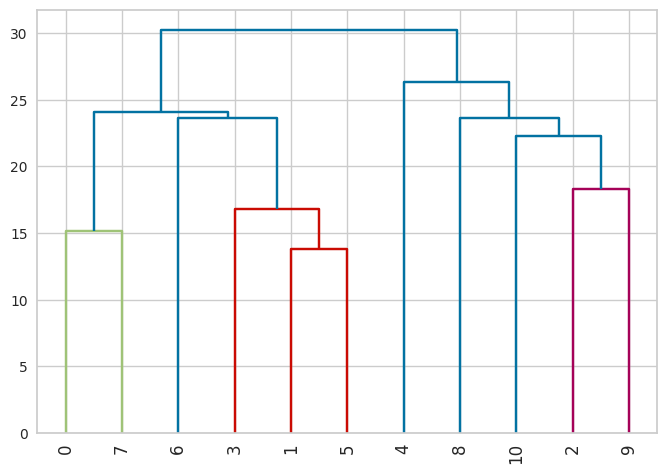

In [79]:
transposed_data = np.transpose(data_encoded)
linked_data = linkage(transposed_data, method='average')
dendrogram(linked_data, truncate_mode='lastp', p=12, leaf_rotation=90, leaf_font_size=12, show_contracted=True)
plt.show()

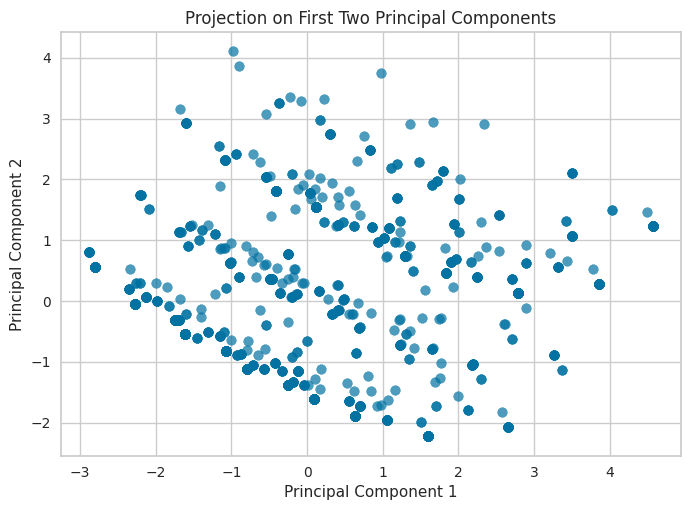

In [80]:
plt.scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Projection on First Two Principal Components')
plt.show()

In [81]:
label_encoder_gender = LabelEncoder()
label_encoder_visit_freq = LabelEncoder()
label_encoder_like = LabelEncoder()

data['Gender'] = label_encoder_gender.fit_transform(data['Gender'])
data['VisitFrequency'] = label_encoder_visit_freq.fit_transform(data['VisitFrequency'])
data['Like'] = label_encoder_like.fit_transform(data['Like'])

In [82]:
features = binary_data
target = data['Like']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [84]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

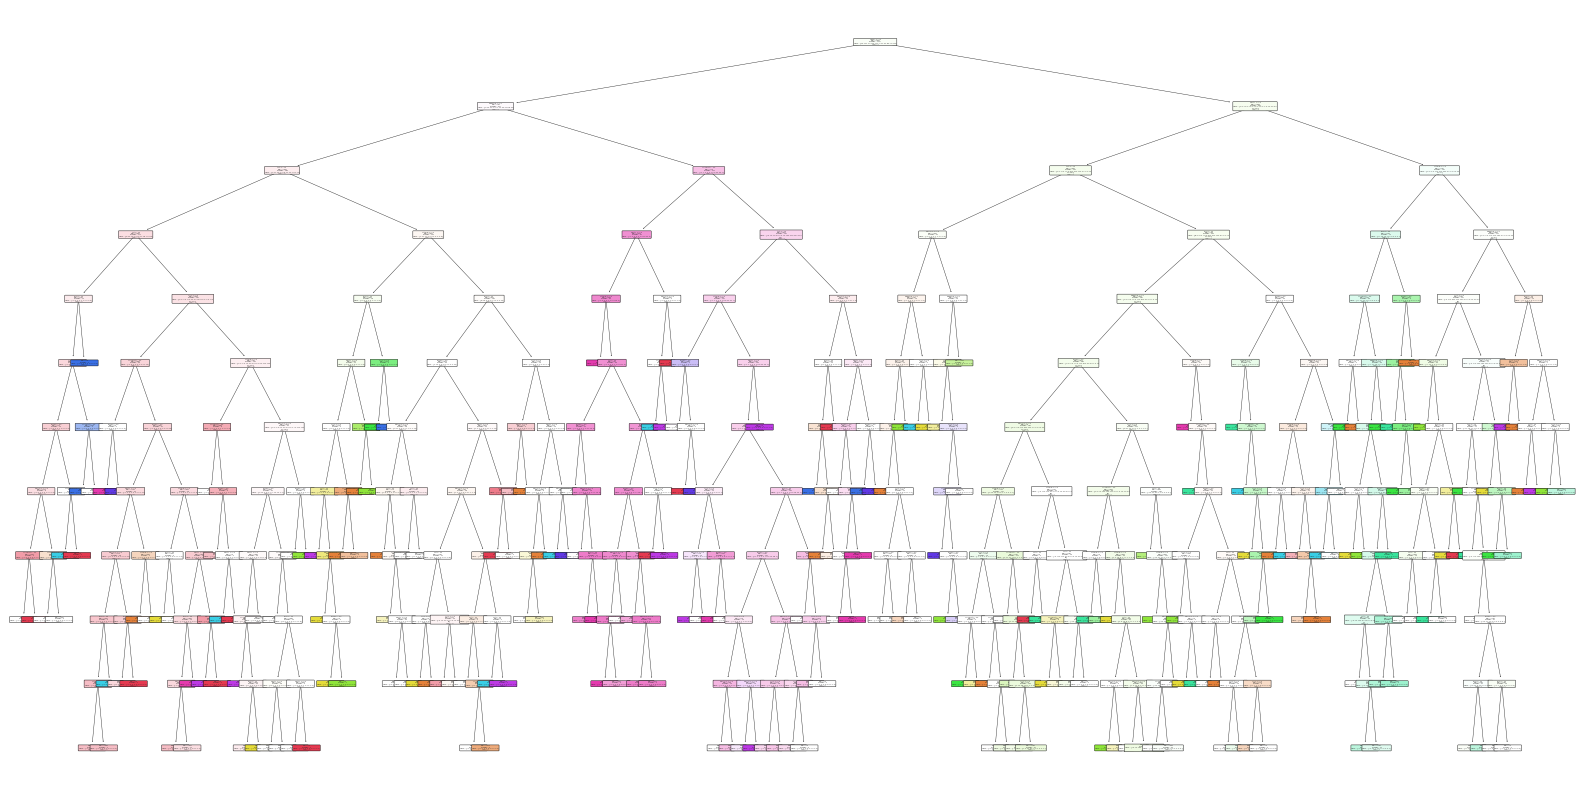

In [85]:
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=features.columns, class_names=label_encoder_like.classes_.astype(str), filled=True, rounded=True)
plt.show()